### https://github.com/andrerodgit/validacao-algoritmos

Parte 1 - Infraestrutura
======================
Para as questões a seguir, você deverá executar códigos em um notebook Jupyter, rodando em ambiente local, certifique-se que:

In [3]:
import sys
import os
import pkg_resources
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import sklearn.utils
import scipy.cluster.hierarchy as sch

from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.stats import zscore
from scipy.spatial.distance import cdist

%matplotlib inline
warnings.filterwarnings('ignore')

### 1. Você está rodando em Python 3.9

In [5]:
print("Python version:", sys.version)

Python version: 3.9.20 (main, Oct  3 2024, 07:27:41) 
[GCC 11.2.0]


### 2. Você está usando um ambiente virtual: Virtualenv ou Anaconda

In [7]:
if 'CONDA_DEFAULT_ENV' in os.environ:
    print("Usando o conda no ambiente: ", os.environ['CONDA_DEFAULT_ENV'])
else:
    print("Não está usando o conda.")
    
print("Caminho do Python:", sys.prefix)


Usando o conda no ambiente:  clusterizacao
Caminho do Python: /home/c86d0990-2dfb-41eb-8d59-4923840cb130/.conda/envs/clusterizacao


### 3. Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico

In [9]:
# pacotes instalados
installed_packages = pkg_resources.working_set
for package in installed_packages:
    print(package)

Pygments 2.15.1
asttokens 2.0.5
backcall 0.2.0
comm 0.2.1
contourpy 1.3.0
cycler 0.12.1
debugpy 1.6.7
decorator 5.1.1
exceptiongroup 1.2.0
executing 0.8.3
fonttools 4.54.1
importlib-metadata 7.0.1
importlib-resources 6.4.5
ipykernel 6.29.5
ipython 8.15.0
jedi 0.19.1
joblib 1.4.2
jupyter-client 8.6.0
jupyter-core 5.7.2
kiwisolver 1.4.7
matplotlib 3.9.2
matplotlib-inline 0.1.6
nest-asyncio 1.6.0
numpy 1.23.5
packaging 24.1
pandas 1.5.3
parso 0.8.3
pexpect 4.8.0
pickleshare 0.7.5
pillow 11.0.0
pip 24.2
platformdirs 3.10.0
prompt-toolkit 3.0.43
psutil 5.9.0
ptyprocess 0.7.0
pure-eval 0.2.2
pyparsing 3.2.0
python-dateutil 2.9.0.post0
pytz 2024.2
pyzmq 25.1.2
scikit-learn 1.5.2
scipy 1.13.1
seaborn 0.13.2
setuptools 75.1.0
six 1.16.0
stack-data 0.2.0
threadpoolctl 3.5.0
tornado 6.4.1
traitlets 5.14.3
typing-extensions 4.11.0
wcwidth 0.2.5
wheel 0.44.0
zipp 3.20.2
autocommand 2.2.2
backports.tarfile 1.2.0
inflect 7.3.1
jaraco.collections 5.1.0
jaraco.context 5.3.0
jaraco.functools 4.0.1
jarac

### 4. Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.

In [11]:
cat requirements.txt

pandas==1.5.3            # Manipulação de dados
numpy>=1.20.3,<1.24.0    # Operações numéricas (exclui 1.24.0)
matplotlib>=3.7.1        # Visualização de gráficos
seaborn>=0.12.2          # Visualização estatística
scikit-learn>=1.2.0      # Algoritmos de clusterização (K-means, DBSCAN)
scipy>=1.10.0            # Análise hierárquica (dendogramas)


### 5. Tire um printscreen do ambiente que será usado rodando em sua máquina.


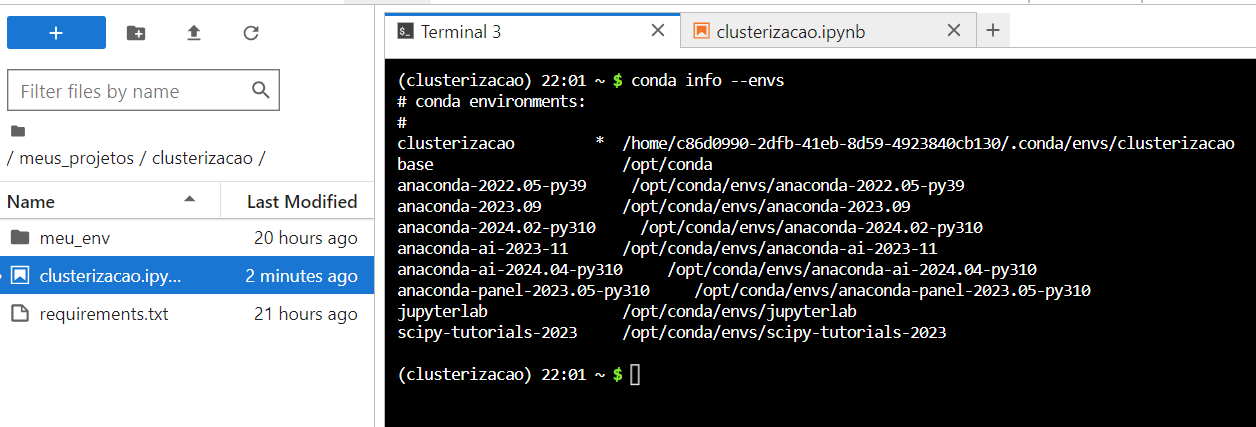

---

Escolha de base de dados
======================
Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

### 1. Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.

In [17]:
# Carregar o dataset do IMDb
df = pd.read_csv('/home/c86d0990-2dfb-41eb-8d59-4923840cb130/meus_projetos/clusterizacao/imdb_top_1000.csv', delimiter=',') 

print(df.head())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

### 2. Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.

<span style="color:blue;">

##### Escolhi o dataset do IMDb porque ele contém informações variadas como avaliações, gêneros e duração, que são ideais para realizar uma análise de clusterização. A motivação é explorar como os filmes podem ser agrupados com base em suas características e identificar padrões, como filmes com alta pontuação e grandes receitas.

##### Os objetivos principais são:

- Clusterizar filmes com características semelhantes, como gênero ou avaliação.
- Explorar padrões entre diferentes variáveis, como ano de lançamento e popularidade.
- Identificar grupos de filmes que possam ser similares em termos de popularidade, crítica ou gênero.

### 3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

IMDB_Rating            1.7
No_of_Votes      2318022.0
Runtime              197.0
Gross          936660920.0
dtype: float64


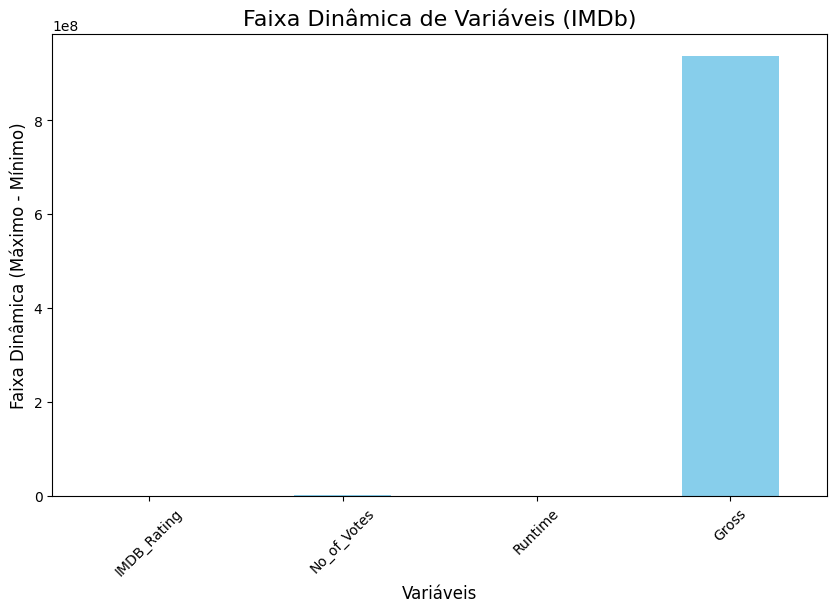

In [21]:
# Remover o texto " min" da coluna 'Runtime' e convertê-la para tipo numérico
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(float)

# Remover a vírgula da coluna 'Gross'
df = df.dropna(subset=['Gross'])
df['Gross'] = df['Gross'].str.replace(',', '').astype(int)

# Converter as colunas para numérico, caso ainda não estejam
df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')
df['No_of_Votes'] = pd.to_numeric(df['No_of_Votes'], errors='coerce')

# Variáveis a serem analisadas
variaveis = ['IMDB_Rating', 'No_of_Votes', 'Runtime', 'Gross']

# Calculando a faixa dinâmica (máximo - mínimo) para cada variável
faixa_dinamica = df[variaveis].apply(lambda x: x.max() - x.min())

# Verificar a faixa dinâmica
print(faixa_dinamica)

# Gráfico da faixa dinâmica
plt.figure(figsize=(10, 6))
faixa_dinamica.plot(kind='bar', color='skyblue')
plt.title('Faixa Dinâmica de Variáveis (IMDb)', fontsize=16)
plt.xlabel('Variáveis', fontsize=12)
plt.ylabel('Faixa Dinâmica (Máximo - Mínimo)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<span style="color:blue;">

#### O que fazer antes da clusterização:
Log-transformar No_of_Votes e Gross.

Remover valores nulos nas variáveis relevantes.

Verificar a normalização de Runtime se necessário.

### 4. Realize o pré-processamento adequado dos dados. Descreva os passos necessários.

<span style="color:blue;">

##### Remover valores nulos nas variáveis relevantes

In [25]:
# Se houver valores nulos, vamos removê-los das linhas dessas variáveis
df = df.dropna(subset=['IMDB_Rating', 'No_of_Votes', 'Runtime', 'Gross'])

# Verificar os dados após o pré-processamento
print(df.head())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A    142.0   
1             The Godfather          1972           A    175.0   
2           The Dark Knight          2008          UA    152.0   
3    The Godfather: Part II          1974           A    202.0   
4              12 Angry Men          1957           U     96.0   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

<span style="color:blue;">

##### Limpar 'No_of_Votes' removendo as vírgulas e convertendo para inteiro

In [27]:
df['No_of_Votes'] = df['No_of_Votes'].replace({',': ''}, regex=True).astype(int)

<span style="color:blue;">

##### Tratar a coluna 'Runtime' (se for do tipo string, remover ' min' e converter para float)

In [29]:
if df['Runtime'].dtype == 'object':
    df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(float)

<span style="color:blue;">

##### Log-transformação para No_of_Votes e Gross

In [31]:
# Apliquei log(1 + variável) para tratar a distribuição assimétrica de No_of_Votes e Gross
df['No_of_Votes'] = np.log1p(df['No_of_Votes'])
df['Gross'] = np.log1p(df['Gross'])

<span style="color:blue;">

##### Normalização/Padronização

In [33]:
scaler = StandardScaler()
df[['IMDB_Rating', 'No_of_Votes', 'Runtime', 'Gross']] = scaler.fit_transform(df[['IMDB_Rating', 'No_of_Votes', 'Runtime', 'Gross']])

In [34]:
# Verificar os dados após o pré-processamento
print(df.head())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate   Runtime  \
0  The Shawshank Redemption          1994           A  0.652059   
1             The Godfather          1972           A  1.852718   
2           The Dark Knight          2008          UA  1.015895   
3    The Godfather: Part II          1974           A  2.835076   
4              12 Angry Men          1957           U -1.021587   

                  Genre  IMDB_Rating  \
0                 Drama     4.780597   
1          Crime, Drama     4.427282   
2  Action, Crime, Drama     3.720651   
3          Crime, Drama     3.720651   
4          Crime, Drama     3.720651   

                   

---

Clusterização
======================
Para os dados pré-processados da etapa anterior você irá:


### 1. Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas:
a. 
K-Média
<br>b. 
DBScan

<span style="color:blue;">

#### K-Média

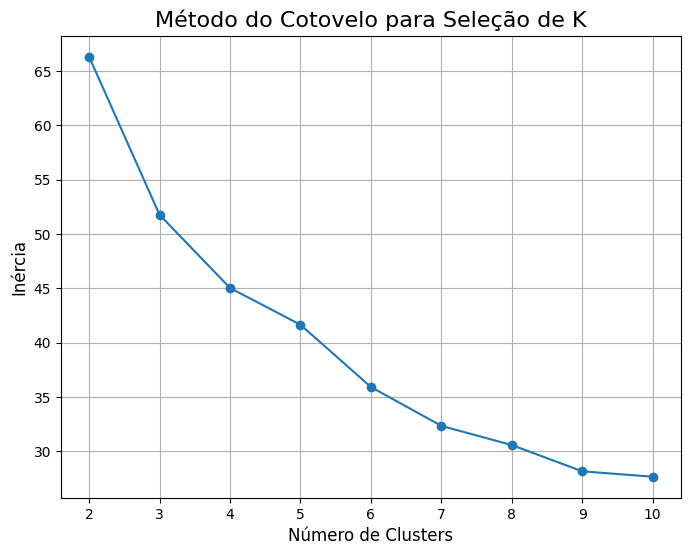

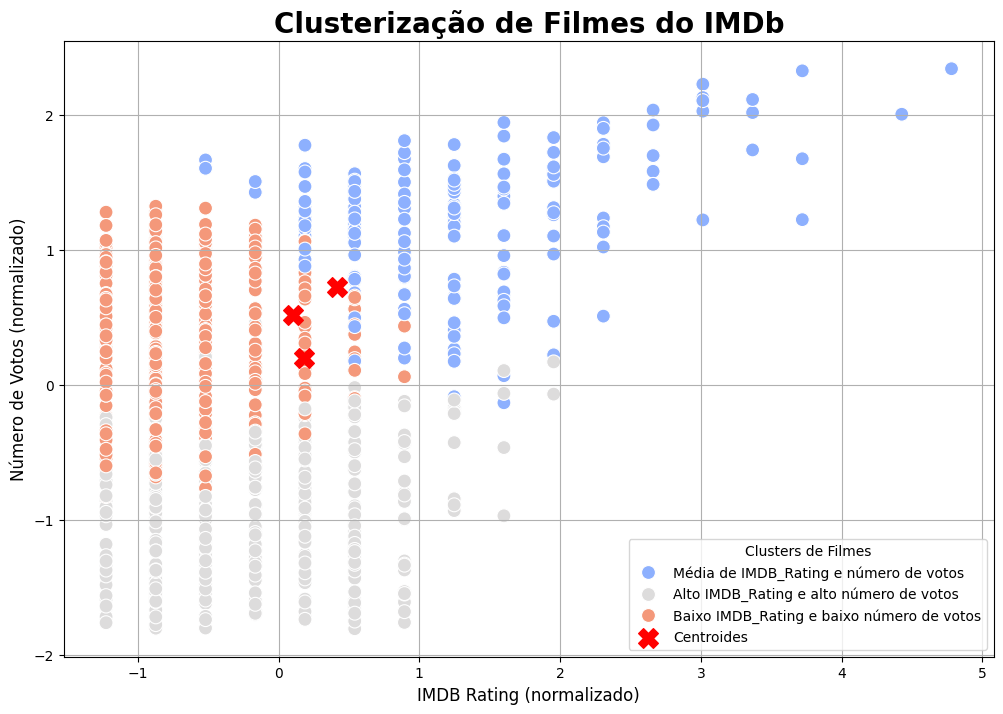

Silhouette Score: 0.2967130454799186


In [37]:
# Garantir uso eficiente de CPU
os.environ["LOKY_MAX_CPU_COUNT"] = "2"

# Selecionando as colunas relevantes para a clusterização
columns_to_scale = ['IMDB_Rating', 'No_of_Votes', 'Runtime', 'Gross']
X = df[columns_to_scale]

# Normalizando as colunas para a clusterização
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Método do Cotovelo para definir o número ótimo de clusters
# Usando uma gama de valores de k (por exemplo, de 2 a 10)
inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Método do Cotovelo para Seleção de K", fontsize=16)
plt.xlabel('Número de Clusters', fontsize=12)
plt.ylabel('Inércia', fontsize=12)
plt.grid(True)
plt.show()

# Inicializando o modelo KMeans com 3 clusters (ajustado conforme o método do cotovelo)
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)  # Use X_scaled, pois foi normalizado

# Aplicando o modelo
df['cluster_kmeans'] = labels_kmeans

# Visualizando os centros dos clusters
centroids = kmeans.cluster_centers_

# Definindo rótulos baseados na interpretação das características médias
cluster_labels = {
    0: "Baixo IMDB_Rating e baixo número de votos",
    1: "Alto IMDB_Rating e alto número de votos",
    2: "Média de IMDB_Rating e número de votos"
}

# Atribuindo rótulos descritivos aos clusters
df['Cluster_Descrição'] = df['cluster_kmeans'].map(cluster_labels)

# Plotando os clusters com os rótulos interpretativos
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df['IMDB_Rating'],  # 'IMDB_Rating'
    y=df['No_of_Votes'],  # 'No_of_Votes'
    hue=df['Cluster_Descrição'],
    palette='coolwarm',  # Mudando a paleta para 'coolwarm' para mais contraste
    s=100
)

# Adicionando centróides ao gráfico
plt.scatter(
    centroids[:, 0],  # 'IMDB_Rating'
    centroids[:, 1],  # 'No_of_Votes'
    c='red',
    marker='X',
    s=200,
    label='Centroides'
)

plt.title("Clusterização de Filmes do IMDb", fontweight='bold', fontsize=20)
plt.xlabel('IMDB Rating (normalizado)', fontsize=12)
plt.ylabel('Número de Votos (normalizado)', fontsize=12)
plt.legend(title="Clusters de Filmes")
plt.grid(True)
plt.show()

# Calculando e exibindo o Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df['cluster_kmeans'])
print(f"Silhouette Score: {silhouette_avg}")

<span style="color:blue;">

#### DBScan

Número de clusters encontrados: 6
Número de outliers (pontos com rótulo -1): 799
Silhouette Score: 0.253850303612182


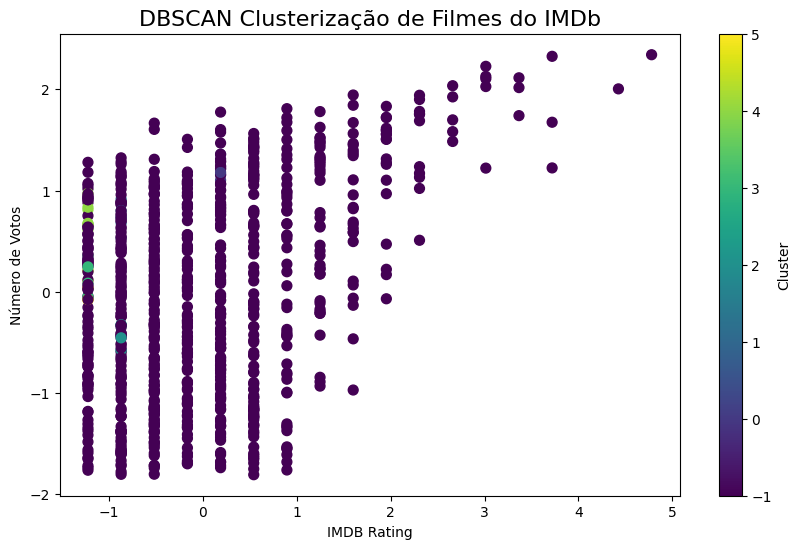

In [39]:
# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicando o DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Ajuste do eps e min_samples
labels_dbscan = dbscan.fit_predict(X_scaled)

# Número de clusters encontrados (ignorando o rótulo -1 de outliers)
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)

# Número de outliers (pontos com rótulo -1)
n_outliers = list(labels_dbscan).count(-1)

# Imprimindo os resultados
print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de outliers (pontos com rótulo -1): {n_outliers}")

# Calculando e exibindo o Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df['cluster_kmeans'])
print(f"Silhouette Score: {silhouette_avg}")

# Adicionando os rótulos aos dados
df['cluster_dbscan'] = labels_dbscan

# Visualizando os clusters com os rótulos atribuídos
plt.figure(figsize=(10, 6))
plt.scatter(df['IMDB_Rating'], df['No_of_Votes'], c=df['cluster_dbscan'], cmap='viridis', s=50)
plt.title('DBSCAN Clusterização de Filmes do IMDb', fontsize=16)
plt.xlabel('IMDB Rating')
plt.ylabel('Número de Votos')
plt.colorbar(label='Cluster')
plt.show()


### 2. Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.

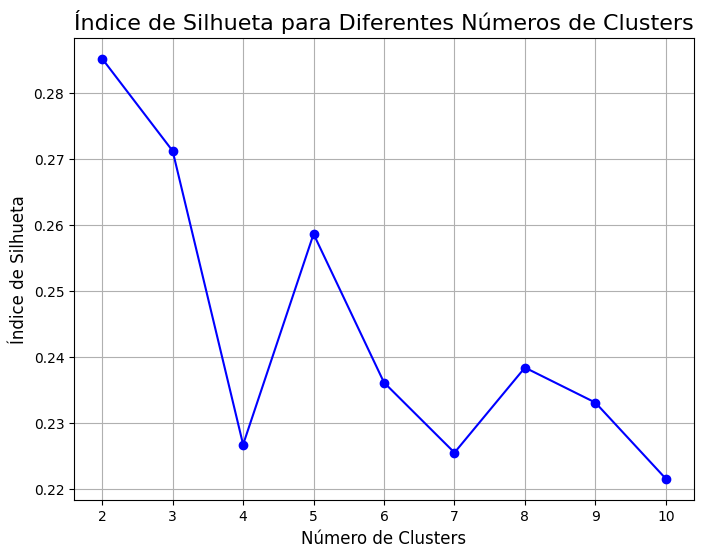

O número ideal de clusters é 2, com um índice de silhueta de 0.2852


In [41]:
# Calcular o índice de silhueta para diferentes números de clusters
silhouette_scores = []
range_n_clusters = list(range(2, 11))  # Testar números de 2 a 10 clusters

for n_clusters in range_n_clusters:
    # Inicializar e treinar o modelo KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels_kmeans = kmeans.fit_predict(X_scaled)  # Use X_scaled para os dados normalizados
    
    # Calcular o índice de silhueta
    silhouette_avg = silhouette_score(X_scaled, labels_kmeans)
    silhouette_scores.append(silhouette_avg)
    
# Exibir o gráfico do índice de silhueta para diferentes números de clusters
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Índice de Silhueta para Diferentes Números de Clusters', fontsize=16)
plt.xlabel('Número de Clusters', fontsize=12)
plt.ylabel('Índice de Silhueta', fontsize=12)
plt.grid(True)
plt.show()

# Exibir o número de clusters com o melhor índice de silhueta
best_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f'O número ideal de clusters é {best_n_clusters}, com um índice de silhueta de {max(silhouette_scores):.4f}')

<span style="color:blue;">

##### Justificativa:
O número ideal de clusters foi escolhido com base no índice de silhueta, que apresentou o valor mais alto para 2 clusters, com um índice de silhueta de 0.2852. Esse valor sugere que, apesar de não ser um valor muito alto (indicando que a separação dos clusters não é perfeitamente clara), a escolha de 2 clusters foi o número mais adequado para o nosso conjunto de dados, fornecendo uma boa distinção entre os grupos de filmes.


### 3. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

<span style="color:blue;">

##### Semelhanças:

Ambos os modelos mostraram dificuldades em separar bem os dados, com pontuações de silhueta baixas.

##### Diferenças:

KMeans é mais simples e pode ter mais sucesso com uma escolha adequada do número de clusters.

DBSCAN identificou muitos outliers e formou clusters pequenos, indicando dificuldades com a estrutura dos dados.

##### Conclusão:

KMeans pode ser mais eficaz, mas o número de clusters precisa ser ajustado. DBSCAN não conseguiu formar clusters claros e precisa de ajustes.


### 4. Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.

In [46]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Calinski-Harabasz Index - Quanto maior o valor, melhor a separação dos clusters.
calinski_harabasz_kmeans = calinski_harabasz_score(X_scaled, df['cluster_kmeans'])
calinski_harabasz_dbscan = calinski_harabasz_score(X_scaled, df['cluster_dbscan'])

# Davies-Bouldin Index - Quanto menor o valor, melhor a separação dos clusters.
davies_bouldin_kmeans = davies_bouldin_score(X_scaled, df['cluster_kmeans'])
davies_bouldin_dbscan = davies_bouldin_score(X_scaled, df['cluster_dbscan'])

# Imprimir os resultados
print(f"Calinski-Harabasz Index (KMeans): {calinski_harabasz_kmeans}")
print(f"Calinski-Harabasz Index (DBSCAN): {calinski_harabasz_dbscan}")
print(f"Davies-Bouldin Index (KMeans): {davies_bouldin_kmeans}")
print(f"Davies-Bouldin Index (DBSCAN): {davies_bouldin_dbscan}")


Calinski-Harabasz Index (KMeans): 339.7502493190071
Calinski-Harabasz Index (DBSCAN): 3.2982841437280945
Davies-Bouldin Index (KMeans): 1.2730377894461833
Davies-Bouldin Index (DBSCAN): 1.3562078297291902



### 4. Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?

<span style="color:blue;">

##### A silhueta não é o índice mais indicado para escolher o número de clusters no DBSCAN, pois a natureza do algoritmo lida de forma diferente com outliers e clusters de diferentes densidades, o que pode afetar a métrica da silhueta.

Medidas de similaridade
======================

### 1. Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.

<span style="color:blue;">

##### 1. Preparação dos Dados:

Organizar as séries temporais em uma estrutura adequada (como DataFrame ou matriz), onde cada linha ou coluna representa uma série temporal.
Garantir que todas as séries tenham o mesmo tamanho e frequência temporal.

##### 2. Cálculo da Correlação Cruzada:

Calcular a correlação cruzada entre todas as séries temporais para medir a semelhança entre elas. A correlação cruzada pode ser calculada usando a função correlate do SciPy ou corr do pandas.
A correlação cruzada nos dá um valor entre -1 e 1, onde valores mais próximos de 1 indicam alta similaridade.

##### 3. Criação da Matriz de Similaridade:

Criar uma matriz de similaridade, onde cada elemento representa a correlação entre duas séries temporais.

##### 4. Escolha do Número de Clusters:

Definir o número de clusters desejado (no caso, 3 clusters), usando métodos como o Método do Cotovelo ou Índice de Silhueta, aplicados na matriz de similaridade.

##### 5. Aplicação do Algoritmo de Clusterização:

Aplicar um algoritmo de clusterização, como K-Means, DBSCAN ou Agglomerative Clustering, para agrupar as séries temporais com base na matriz de similaridade.
Para o K-Means, escolher 3 clusters (baseado no critério de similaridade de correlação cruzada).

##### 6. Análise dos Resultados:

Avaliar os resultados dos clusters, verificando se as séries temporais em cada grupo têm padrões semelhantes.
Visualizar os resultados, se possível, para garantir que a clusterização faça sentido.

##### 7. Ajustes Finais:

Se necessário, ajustar os parâmetros do algoritmo de clusterização para melhorar os resultados.
Validar a qualidade da clusterização usando métricas como o Índice de Silhueta.


### 2. Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

<span style="color:blue;">

#### O mais adequado seria o K-Means:

1. O número de clusters é fixo (3), o que é ideal para o K-Means.
2. O algoritmo é simples e eficiente para problemas com um número determinado de clusters.
3. Com a matriz de correlação cruzada, podemos usar o K-Means para agrupar as séries com base em sua similaridade.
4. O K-Means oferece resultados claros e interpretáveis, sem a complexidade de métodos como o DBSCAN.


### 3. Indique um caso de uso para essa solução projetada.

<span style="color:blue;">

##### Um caso de uso para essa solução seria agrupamento de ativos financeiros em um portfólio de investimentos.

As 10 séries temporais poderiam representar o desempenho de diferentes ações ao longo do tempo. Usando K-Means com base na correlação cruzada, podemos identificar grupos de ações com comportamentos semelhantes, ajudando os investidores a diversificar melhor seu portfólio ao escolher ativos que não estão altamente correlacionados entre si.


### 4. Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.

<span style="color:blue;">

##### Uma outra estratégia para medir a similaridade entre séries temporais seria usar a distância dinâmica de tempo (DTW).

##### Aqui estão os passos necessários:

1. Coletar as séries temporais: Tenha as 10 séries temporais que você deseja agrupar.

2. Aplicar a DTW: Use a DTW para calcular a similaridade entre todas as combinações de pares de séries temporais. A DTW mede a "distância" entre duas séries, mesmo que estejam deslocadas no tempo.

3. Construir a matriz de distâncias: Organize as distâncias calculadas em uma matriz, onde cada célula representa a distância entre duas séries temporais.

4. Escolher o algoritmo de clusterização: Use K-Means ou qualquer outro algoritmo de clusterização para agrupar as séries com base na matriz de distâncias.

5. Analisar os grupos: Observe os clusters formados para entender como as séries mais semelhantes foram agrupadas.